Ref: https://www.youtube.com/watch?v=vV12dGe_Fho&t=164s

## Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## EDA

In [2]:
df = pd.read_csv('Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df = df.set_index('Date')

In [ ]:
df.index

Index(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010', '09-04-2010',
       ...
       '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012',
       '28-09-2012', '05-10-2012', '12-10-2012', '19-10-2012', '26-10-2012'],
      dtype='object', name='Date', length=6435)

In [16]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

<Axes: title={'center': 'Weekly Sales'}, xlabel='Date'>

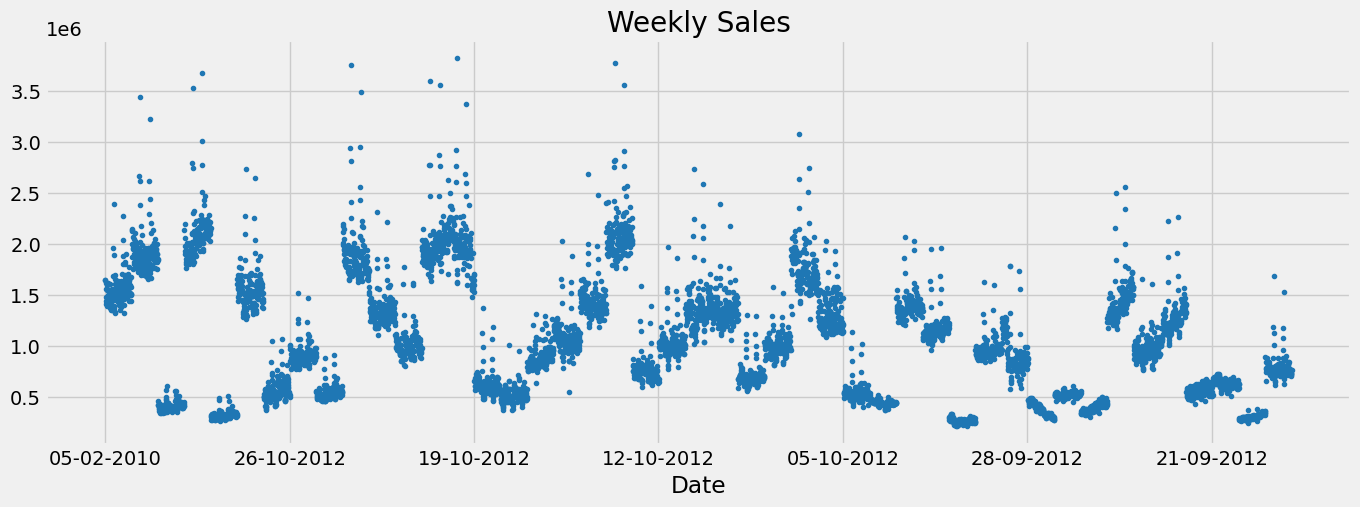

In [10]:
df.Weekly_Sales.plot(style='.', figsize=(15,5), color=color_pal[0], title='Weekly Sales')

<Axes: title={'center': 'Weekly Sales'}, xlabel='Date'>

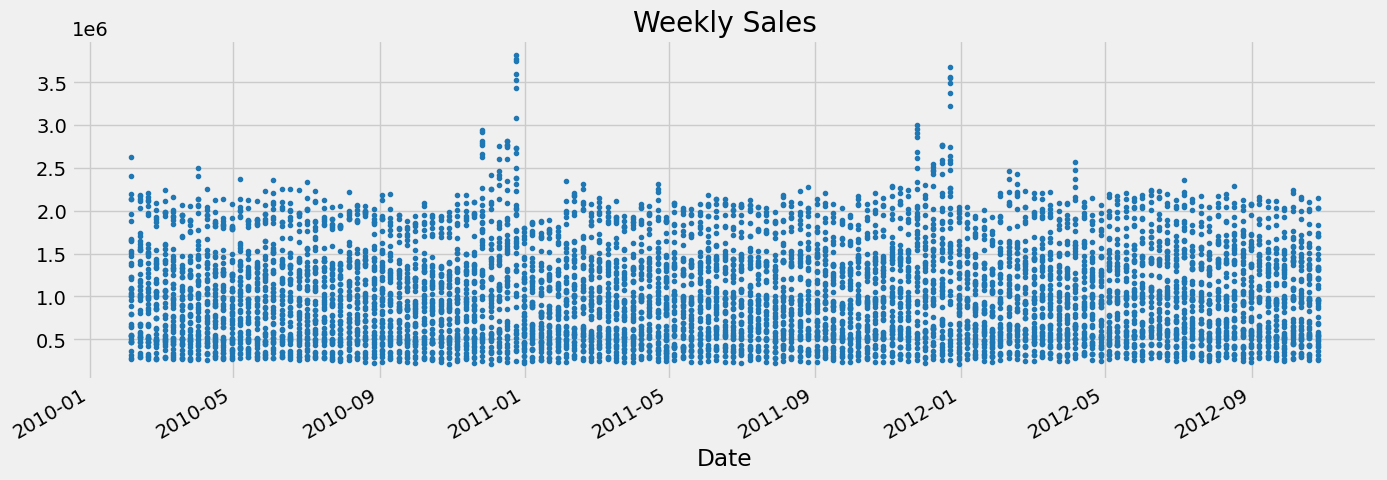

In [17]:
df.Weekly_Sales.plot(style='.', figsize=(15,5), color=color_pal[0], title='Weekly Sales')

In [15]:
df.index

Index(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010', '09-04-2010',
       ...
       '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012',
       '28-09-2012', '05-10-2012', '12-10-2012', '19-10-2012', '26-10-2012'],
      dtype='object', name='Date', length=6435)

<Axes: xlabel='Date'>

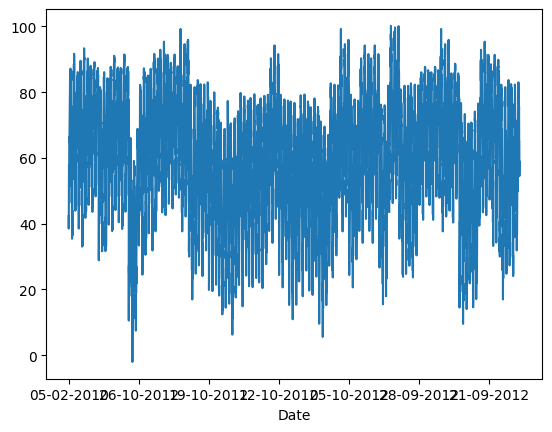

In [8]:
df.Temperature.plot()

In [18]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

<Axes: xlabel='Date'>

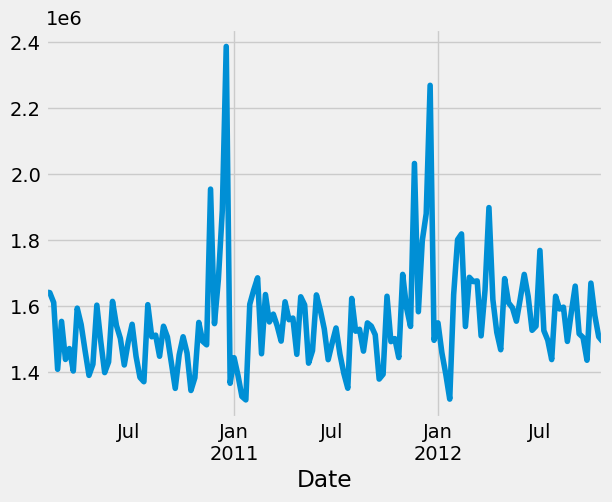

In [22]:
df.loc[df.Store==1, 'Weekly_Sales'].plot()

<Axes: xlabel='Date'>

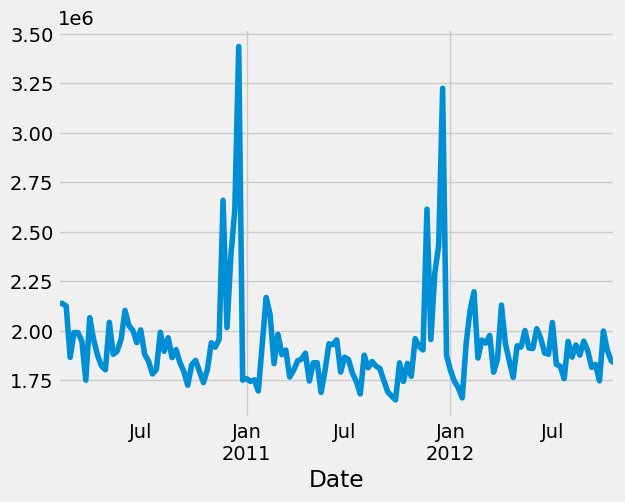

In [23]:
df.loc[df.Store==2, 'Weekly_Sales'].plot()


## Train Test Split

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [25]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [26]:
df.index.min()

Timestamp('2010-02-05 00:00:00')

In [27]:
df.index.max()

Timestamp('2012-10-26 00:00:00')

In [28]:
6435/45

143.0

In [29]:
80*143/100

114.4

143 semanas no dataset. 113 semanas para treino e 30 semanas para teste. 113*45=5085 linhas.

In [30]:
113*45

5085

In [31]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [32]:
df.loc[df.Store==1]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


In [34]:
df = df.reset_index()

In [55]:
df = df.sort_values(['Date', 'Store']).reset_index(drop=True)


In [56]:
indice_separacao = 5085
df.sort_index()
train = df.iloc[0:indice_separacao]
test = df.iloc[indice_separacao:]

In [57]:
# Verificando o tamanho dos dataframes de treino e teste
print("Tamanho do DataFrame de Treino:", len(train))
print("Tamanho do DataFrame de Teste:", len(test))

Tamanho do DataFrame de Treino: 5085
Tamanho do DataFrame de Teste: 1350


In [58]:
train

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-02-05,2,2136989.46,0,40.19,2.572,210.752605,8.324
2,2010-02-05,3,461622.22,0,45.71,2.572,214.424881,7.368
3,2010-02-05,4,2135143.87,0,43.76,2.598,126.442065,8.623
4,2010-02-05,5,317173.10,0,39.70,2.572,211.653972,6.566
...,...,...,...,...,...,...,...,...
5080,2012-03-30,41,1239423.19,0,51.56,3.750,197.413326,6.589
5081,2012-03-30,42,544408.14,0,67.92,4.294,130.967097,7.545
5082,2012-03-30,43,623258.40,0,69.88,3.845,212.814221,9.653
5083,2012-03-30,44,310027.29,0,53.20,3.734,130.967097,5.774


In [59]:
test

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5085,2012-04-06,1,1899676.88,0,70.43,3.891,221.435611,7.143
5086,2012-04-06,2,2129035.91,0,68.43,3.891,221.073764,6.891
5087,2012-04-06,3,503232.13,0,73.01,3.891,224.939340,6.664
5088,2012-04-06,4,2470206.13,0,67.69,3.864,131.037548,4.308
5089,2012-04-06,5,402985.70,0,70.40,3.891,222.022576,5.801
...,...,...,...,...,...,...,...,...
6430,2012-10-26,41,1316542.59,0,41.80,3.686,199.219532,6.195
6431,2012-10-26,42,514756.08,0,70.50,4.301,131.193097,6.943
6432,2012-10-26,43,587603.55,0,69.17,3.506,214.741539,8.839
6433,2012-10-26,44,361067.07,0,46.97,3.755,131.193097,5.217


In [60]:
train = train.set_index('Date')
test = test.set_index('Date') 


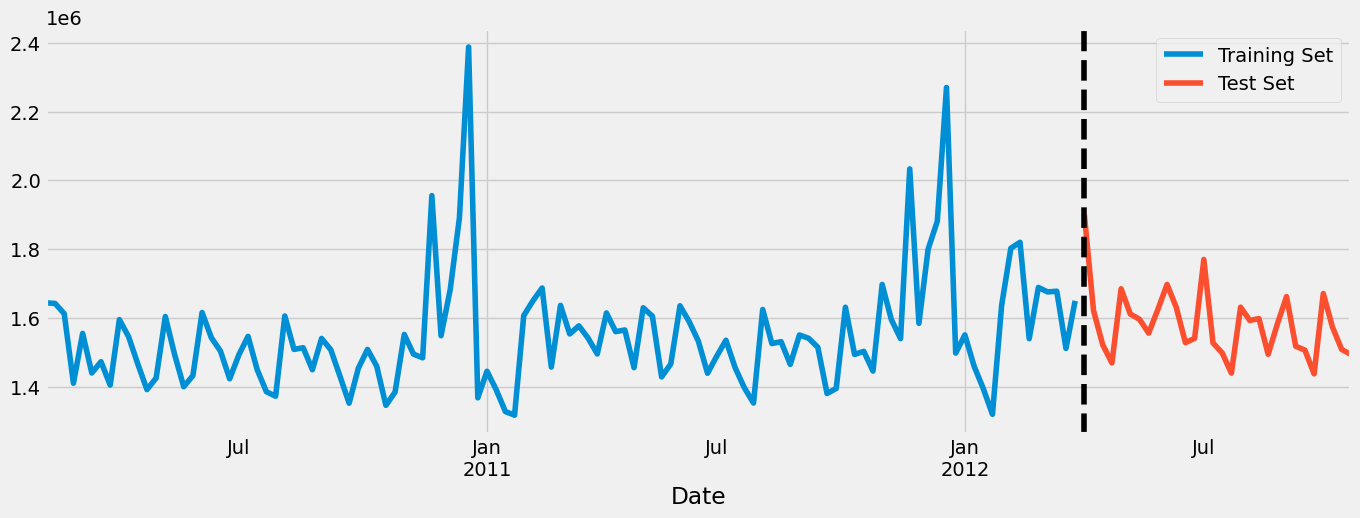

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
train.loc[train.Store==1, 'Weekly_Sales'].plot(ax=ax, label='Training Set')
test.loc[test.Store==1, 'Weekly_Sales'].plot(ax=ax, label='Test Set')
ax.axvline('2012-04-06', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()
